## 키와 몸무게의 지표 확인(data split 없이 진행)

In [71]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
import pandas as pd
df = pd.read_csv('키와몸무게.csv',encoding='cp949')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [106]:
# pandas를 통해 데이터를 확인합니다.

# 파운드로 적혀 있는 무게 값을 KG 단위로 변환합니다.
# 1 파운드 = 0.45359237kg
df['Weight(kg)'] = df['Weight'] * 0.45359237

# inch로 적혀 있는 키 값을 cm 단위로 변환합니다.
# 1 inch = 2.54cm
df['Height(cm)'] = df['Height'] * 2.54

# inch를 cm로, pound를 kg으로 변환한 새로운 컬럼 생성

# 변환된 데이터 확인
df

,Gender,Height,Weight,Weight(kg),Height(cm)
0,Male,73.847017,241.893563,109.721075,187.571423
1,Male,68.781904,162.310473,73.622792,174.706036
2,Male,74.110105,212.740856,96.497629,188.239668
3,Male,71.730978,220.042470,99.809586,182.196685
4,Male,69.881796,206.349801,93.598695,177.499761
...,...,...,...,...,...
9995,Female,66.172652,136.777454,62.041210,168.078536
9996,Female,67.067155,170.867906,77.504378,170.350573
9997,Female,63.867992,128.475319,58.275424,162.224700
9998,Female,69.034243,163.852461,74.322226,175.346978


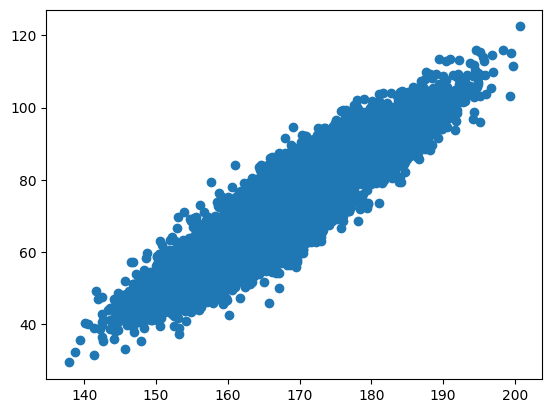

In [75]:
# 키와 몸무게에 관한 산점도를 그렵봅니다.
# 산점도가 직선의 방향성을 지니고 있을 때, 선형회귀를 사용합니다.
import matplotlib.pyplot as plt

키 = df["Height(cm)"]
몸무게 = df["Weight(kg)"]
plt.plot(키, 몸무게, 'o')
plt.show()

In [107]:
# 선형회귀 모델을 통한 학습을 진행합니다.
from sklearn.linear_model import LinearRegression
import numpy as np

data = df[['Height(cm)']]
target = df['Weight(kg)']

# 선형회귀 모델 생성 및 학습
lr = LinearRegression()
lr.fit(data, target)

LinearRegression()

In [93]:
# 학습한 내용을 바탕으로 예측합니다.
lr.predict([[170]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75.19390579])

In [94]:
# 회귀식의 기울기와 절편을 구합니다
# 기울기 : coef_,  절편 : intercept_
print("기울기:", lr.coef_, "절편", lr.intercept_)

기울기: [1.37815071] 절편 -159.09171408121202


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


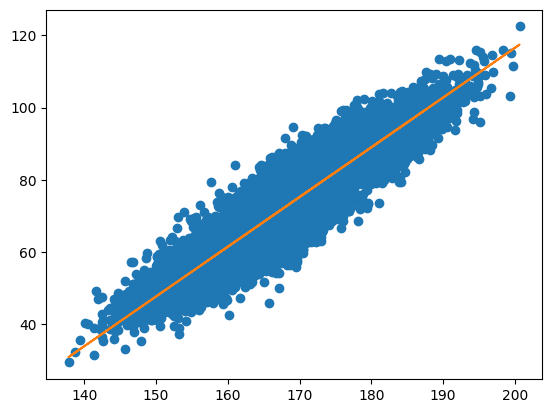

In [95]:
# 예측값 그래프 그리기
plt.plot(키, 몸무게, 'o')
plt.plot(키,lr.predict(키.values.reshape(-1,1)))
plt.show()

## data split을 통한 모델 검증

In [101]:
#case 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# train, test 분리를 위해 numpy배열로 변환
data = df['Height(cm)'].to_numpy()
target = df['Weight(kg)'].to_numpy()


# train, test 분리
훈련용_data, 테스트용_data, 훈련용_target, 테스트용_target = train_test_split(data, target, test_size=0.2, random_state=40)

# 행(row)으로 나열된 데이터를 열(column) 단위로 변경
훈련용_data = 훈련용_data.reshape(-1,1)
테스트용_data = 테스트용_data.reshape(-1,1)

In [102]:
# 선형회귀모델 학습

# [170] 데이터 넣어서 예측값 확인하기
lr.predict([[170]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75.19390579])

In [104]:
# score 확인
print(lr.score(훈련용_data , 훈련용_target))
print(lr.score(테스트용_data , 테스트용_target))

0.8564042755394425
0.8501873889475686


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


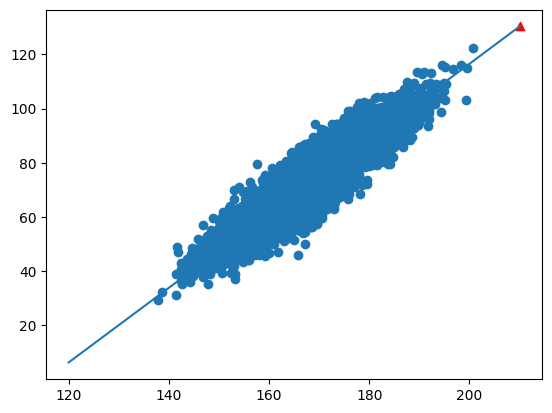

In [105]:
# 예측 그래프 그리기
import matplotlib.pyplot as plt
plt.scatter(훈련용_data , 훈련용_target)
plt.plot( [120,210], [120*lr.coef_ +lr.intercept_ ,
                    210*lr.coef_ + lr.intercept_])
plt.scatter(210 , 210*lr.coef_ + lr.intercept_ ,marker="^",color="red")
plt.show()